The goal is to build a multiple linear regression model and evaluate the model.
This activity has three parts:

**Part 1**: EDA & Checking Model Assumptions

What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2**: Model Building and evaluation

What resources do you find yourself using as you complete this stage?

**Part 3**: Interpreting Model Results

What key insights emerged from your model(s)?

What business recommendations do you propose based on the models built?

# task 1: Import libraries & load data

In [52]:
# libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import time
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [53]:
# load data

data = pd.read_csv('/content/2017_Yellow_Taxi_Trip_Data.csv')

# Task 2a. Explore data with EDA

What are some purposes of EDA before constructing a multiple linear regression model?

1. Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

2. EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

3. Look for duplicates.

4. It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.

5. Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. As discussed in the earlier stage, we can create a duration variable by subtracting tpep_dropoff from tpep_pickup time.

In [54]:
# what does the first 5 rows look like?

data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [55]:
# what does the last rows look like?

data.tail()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00
22698,17208911,1,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,1,2.10,1,N,239,236,1,11.0,0.0,0.5,2.35,0.00,0.3,14.15


In [56]:
# how many rows and columns in the data set?

data.shape

(22699, 18)

In [57]:
# basic info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [58]:
# we can see no missing values. Lets check explicitly

# missing values in the dataframe
print('Total number of missing values in the dataset:', data.isna().sum().sum())
print()

print('Missing Values per column:')
print()
data.isna().sum()

Total number of missing values in the dataset: 0

Missing Values per column:



,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0


In [59]:
# check duplicates

print(f'Shape of dataframe:{data.shape}')
print(f'shape of dataframe with duplicates dropped: {data.drop_duplicates().shape}')

Shape of dataframe:(22699, 18)
shape of dataframe with duplicates dropped: (22699, 18)


There is no duplicate or missing value in the dataframe.

In [60]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


As discussed in the earlier notebook about which features were to consider.Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:

* trip_distance
* fare_amount
* duration

We look into these features for some things stand out from the above summary statistics. For instance,
1. There are clearly some outliers in several variables, like tip_amount ($200) and total_amount ($1,200).
2. Also, a number of the variables, such as mta_tax, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.



# Task 2b. Convert pickup & dropoff columns to datetime

In [61]:
# Check the format of the data

data['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [62]:
# Convert datetime columns to datetime

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', data['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', data['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

print()
print('after conversion:')
# Convert `tpep_dropoff_datetime` to datetime format
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', data['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', data['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object

after conversion:
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


# Task 2c. Create duration column

In [63]:
# Create `duration` column
data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

#Task 2d. Box plots

Plot a box plot for each feature: trip_distance, fare_amount, duration.

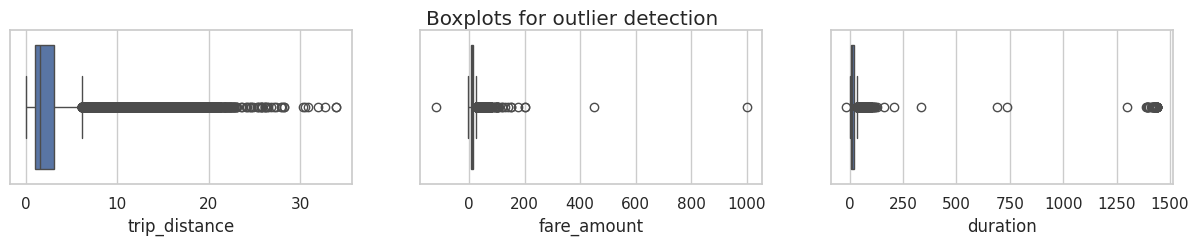

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=data['trip_distance'])
sns.boxplot(ax=axes[1], x=data['fare_amount'])
sns.boxplot(ax=axes[2], x=data['duration'])
plt.show()

1. All three variables contain outliers. Some are extreme, but others not so much.

2. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for *fare_amount* and *duration* definitely seem to have problematic outliers on the higher end.

3. Probably not for the latter two, but for trip_distance it might be okay.

#Task 2e. Imputations

### trip_distance outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [66]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(data['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances were captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

lets Calculate the count of rides where the trip_distance is zero.

In [67]:
sum(data['trip_distance']==0)

148

148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the trip_distance column will remain untouched with regard to outliers.

### fare_amount outliers

In [68]:
data['fare_amount'].describe()

,fare_amount
count,22699.000000
mean,13.026629
std,13.243791
min,-120.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,999.990000


The range of values in the fare_amount column is large and the extremes don't make much sense.

* **Low value**s : Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values**: The maximum fare amount in this dataset is nearly \$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \$8. The standard formula of Q3 + (1.5 * IQR) yields $26.50.

That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of 6, which results in a cap of $62.50.

Impute values less than $0 with 0.

In [69]:
# Impute values less than $0 with 0
data.loc[data['fare_amount'] < 0, 'fare_amount'] = 0
data['fare_amount'].min()

0.0

In [70]:
# Now impute the maximum value as Q3 + (6 * IQR).

def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        data.loc[data[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        data.loc[data[col] > upper_threshold, col] = upper_threshold
        print(data[col].describe())
        print()

In [71]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



### duration outliers

In [72]:
data['duration'].describe()

,duration
count,22699.000000
mean,17.013777
std,61.996482
min,-16.983333
25%,6.650000
50%,11.183333
75%,18.383333
max,1439.550000


The duration column has problematic values at both the lower and upper extremities.

Low values: There should be no values that represent negative time. Impute all negative durations with 0.

High values: Impute high values the same way you imputed the high-end outliers for fares: Q3 + (6 * IQR).

In [73]:
# Impute a 0 for any negative values
data.loc[data['duration'] < 0, 'duration'] = 0
data['duration'].min()

0.0

In [74]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



# Task 3a. Feature engineering

### Create mean_distance column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you do know to generalize about ones you do not know.

In this step, create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points.  All trips that share a unique pair of start and end points get grouped and averaged.A new column mean_distance will be added where the value at each row is the average for all trips with those pickup and dropoff locations.

we begin by creating a helper column called pickup_dropoff, which will contain the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

In [75]:
# Create `pickup_dropoff` column

data['pickup_dropoff'] = data['PULocationID'].astype(str) + ' ' + data['DOLocationID'].astype(str)
data['pickup_dropoff'].head(2)

,pickup_dropoff
0,100 231
1,186 43


In [76]:
grouped = data.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [77]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [78]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
data['mean_distance'] = data['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
data['mean_distance'] = data['mean_distance'].map(grouped_dict)

# Confirm that it worked
data[(data['PULocationID']==100) & (data['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


### Create mean_duration column

In [79]:
grouped = data.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

data['mean_duration'] = data['pickup_dropoff']
data['mean_duration'] = data['mean_duration'].map(grouped_dict)

# Confirm that it worked
data[(data['PULocationID']==100) & (data['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


### Create day and month columns

Creating two new columns, day (name of day) and month (name of month) by extracting the relevant information from the tpep_pickup_datetime column.

In [80]:
# Create 'day' col
data['day'] = data['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
data['month'] = data['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

### Create rush_hour column

Define rush hour as:

* Any weekday (not Saturday or Sunday) AND
* Either from 06:00–10:00 or from 16:00–20:00

Create a binary rush_hour column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [81]:
# Create 'rush_hour' col
data['rush_hour'] = data['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
data.loc[data['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [82]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [83]:
# Apply the `rush_hourizer()` function to the new column
data.loc[(data.day != 'saturday') & (data.day != 'sunday'), 'rush_hour'] = data.apply(rush_hourizer, axis=1)
data.head()

<ipython-input-83-5ad285ab5e03>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.loc[(data.day != 'saturday') & (data.day != 'sunday'), 'rush_hour'] = data.apply(rush_hourizer, axis=1)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


# Task 4. Scatter plot

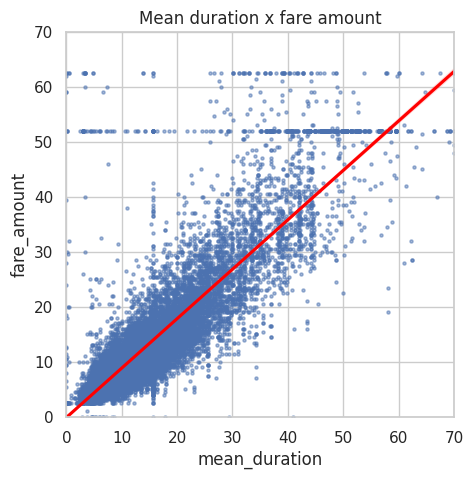

In [84]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=data['mean_duration'], y=data['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The mean_duration variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of $62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [85]:
data[data['fare_amount'] > 50]['fare_amount'].value_counts().head()

,count
fare_amount,
52.0,514
62.5,84
59.0,9
50.5,9
57.5,8


Lets examine these trip first 30 of them

In [86]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
data[data['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

# Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [88]:
data2 = data.copy()

data2 = data2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


# Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between fare_amount, mean_duration, and mean_distance.

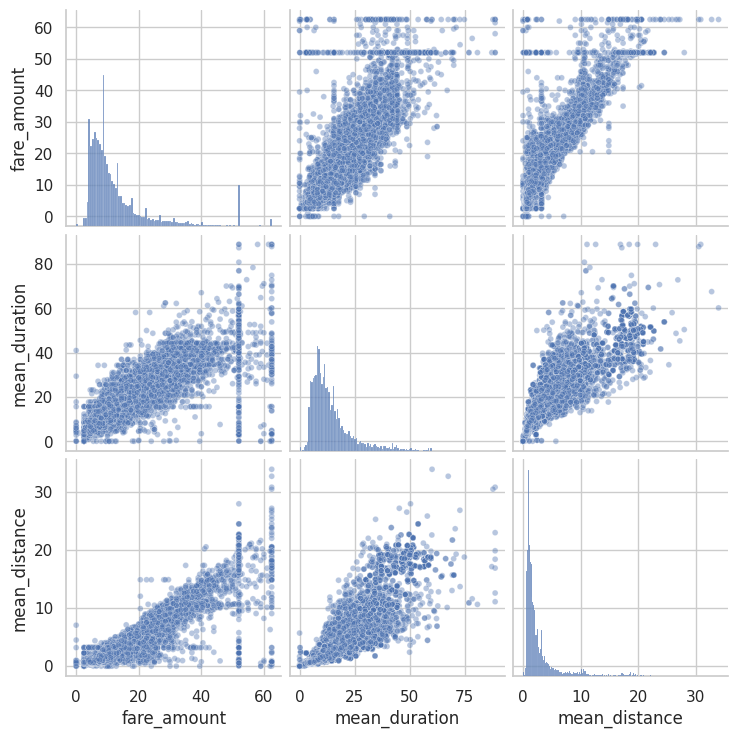

In [89]:
sns.pairplot(data2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             )

These variables all show linear correlation with each other. Investigate this further.

# Task 7. Identify correlations

These variables all show linear correlation with each other. Investigate this further.

In [90]:
data2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


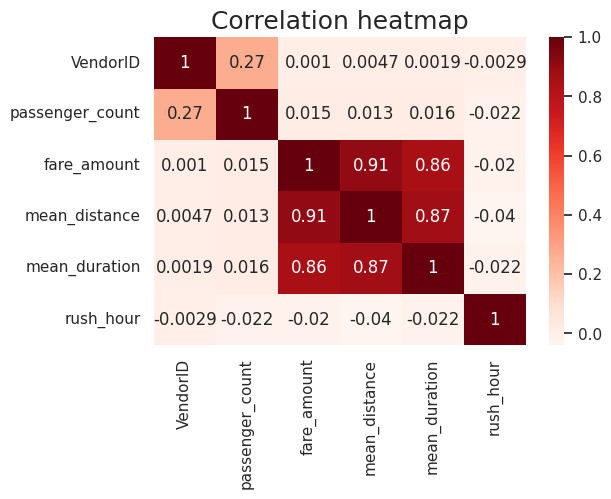

In [91]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(data2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

mean_duration and mean_distance are both highly correlated with the target variable of fare_amount They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict fare_amount, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

# Task 8: Modell Building

### Task 8a. Split data into outcome variable and features

In [92]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


* X represents the features
* y represents the outcome (target) variable.

In [93]:
# Remove the target column from the features
X = data2.drop(columns=['fare_amount'])

# Set y variable
y = data2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data

Dummy encode categorical variables

In [94]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

In [95]:
# Get dummies
X = pd.get_dummies(X, drop_first=True).astype(int)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3,22,0,1
1,1,3,24,0,0
2,1,0,7,1,0
3,1,3,30,0,1
4,1,4,14,0,1


Split data into training and test sets

In [96]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Standardize the data

In [97]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  1.00023227  0.20325417 -0.64893329  0.89286563]
 [-0.50301524 -0.66749501 -0.68797873  1.54099045  0.89286563]
 [ 0.27331093 -0.38954046 -0.58895285 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.38954046 -0.68797873 -0.64893329 -1.11998936]
 [-0.50301524 -0.66749501 -0.88603049  1.54099045 -1.11998936]
 [ 1.82596329  0.72227772  1.09448708 -0.64893329  0.89286563]]


Fit the model

In [98]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

###Task 8c. Evaluate model

Train Data

In [99]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8376235719966014
R^2: 0.8376235719966014
MAE: 2.242711586491875
MSE: 18.137697713882044
RMSE: 4.258837601257184


Test Data

In [100]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [101]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8658034031880519
R^2: 0.8658034031880519
MAE: 2.1889864396079424
MSE: 14.59342280273358
RMSE: 3.8201338723575615


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R2 of 0.868 means that 86.8% of the variance in the fare_amount variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

#Task 9a. Results

In [102]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,11.711255,2.288745
18134,28.0,16.271573,11.728427
4655,5.5,6.094771,-0.594771
7378,15.5,16.190126,-0.690126
13914,9.5,9.589546,-0.089546


Task 9b. Visualize model results

**Create a scatterplot to visualize actual vs. predicted.**

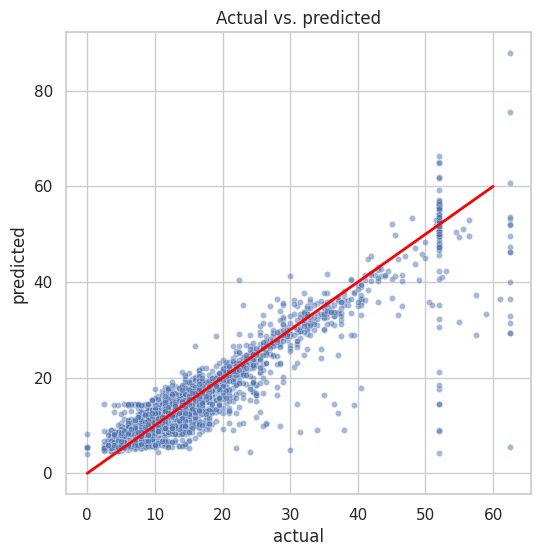

In [103]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

**Visualize the distribution of the residuals using a histogram**

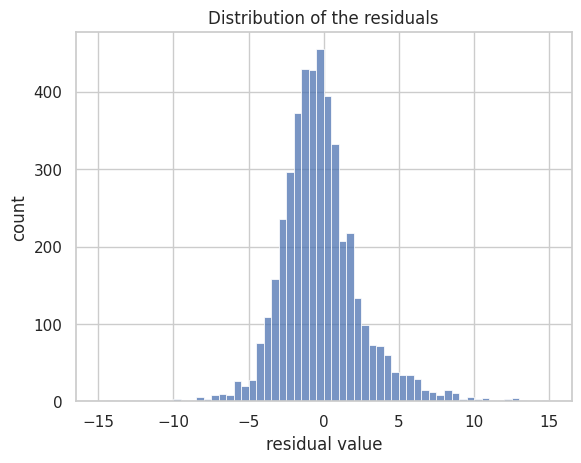

In [104]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [105]:
results['residual'].mean()

-0.014672640147326334

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

**Create a scatterplot of residuals over predicted.**

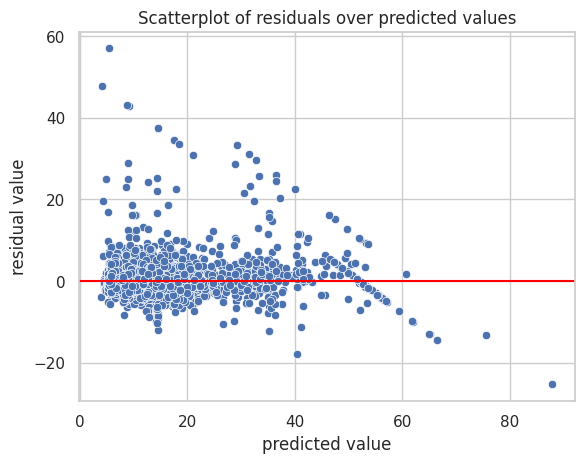

In [106]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which we know are the imputed maximum of \$62.50 and the flat rate of $52 for JFK airport trips.

Task 9c. Coefficients

In [107]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.029405,7.013108,2.929641,0.10197,-0.047146


controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of \$7.13.

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data).

* Calculate the standard deviation of mean_distance in the X_train data.

* Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

In [108]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.5978096163681217
1.9828361588519572


for every 3.57 miles traveled, the fare increased by a mean of \$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \$2.00.

# Task 9d. Conclusion

**What are the key takeaways from this?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on the use case).

**What results can be presented from this notebook?**

we can discuss meeting linear regression assumptions, and you can present the MAE and RMSE scores obtained from the model.